<a href="https://colab.research.google.com/github/JustKeepPlay/PyProject/blob/main/Car_classification_with_multiple_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os # use commandline
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
data  = pd.read_csv(io.BytesIO(uploaded['car.csv']))

Saving car.csv to car.csv


In [ ]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,med,2,4,small,high,acc
1,vhigh,med,2,4,med,high,acc
2,vhigh,med,2,4,big,med,acc
3,vhigh,med,2,4,big,high,acc
4,vhigh,med,2,more,med,high,acc


In [ ]:
data.buying.unique()
data.maint.unique()
data.doors.unique()

array(['2', '3', '4', '5more'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder , StandardScaler
data = data.apply(LabelEncoder().fit_transform)
data

,buying,maint,doors,persons,lug_boot,safety,class
0,3,2,0,1,2,0,0
1,3,2,0,1,1,0,0
2,3,2,0,1,0,2,0
3,3,2,0,1,0,0,0
4,3,2,0,2,1,0,0
...,...,...,...,...,...,...,...
1589,1,1,3,1,1,1,1
1590,1,1,3,1,0,1,1
1591,1,1,3,2,2,1,1
1592,1,1,3,2,1,1,1


In [ ]:

from sklearn.preprocessing import RobustScaler ,MinMaxScaler
import sklearn.preprocessing
scaler = RobustScaler()
sc = MinMaxScaler()
X = data.iloc[:,0:6].values
y = data.iloc[:,6].values
X = scaler.fit_transform(X)
X1 = sc.fit_transform(X)
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

In [ ]:
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.25)

In [ ]:
modelT = DecisionTreeClassifier(criterion='entropy',max_depth=6)
modelT.fit(X_train,y_train)
y_pred = modelT.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=modelT.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.9430962343096234
Test data accuracy: 0.924812030075188


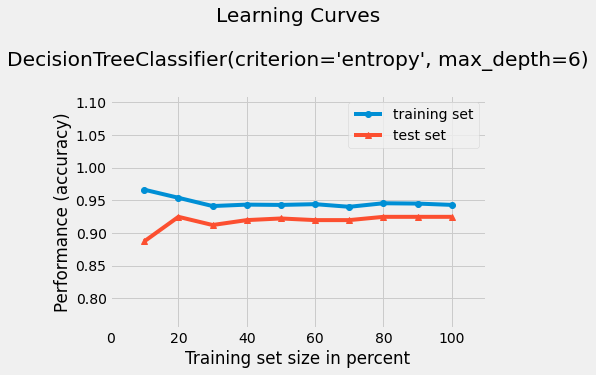

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plot_learning_curves(X_train, y_train, X_test, y_test, modelT,scoring='accuracy')
plt.show()

In [ ]:
modelG = GaussianNB()
modelG.fit(X_train,y_train)
y_pred = modelG.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=modelG.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))


Train data accuracy: 0.8075313807531381
Test data accuracy: 0.7969924812030075


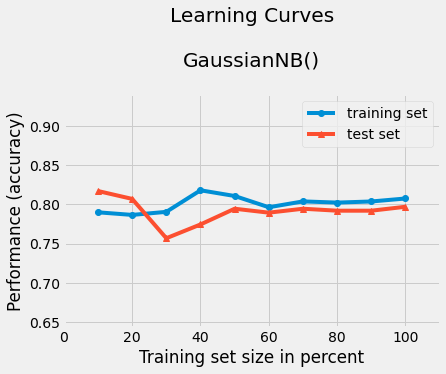

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plot_learning_curves(X_train, y_train, X_test, y_test, modelG,scoring='accuracy')
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,y, random_state = 1, test_size = 0.25)
modelM =MultinomialNB()
modelM.fit(X_train,y_train)
y_pred = modelM.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=modelM.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.7556485355648536
Test data accuracy: 0.7694235588972431


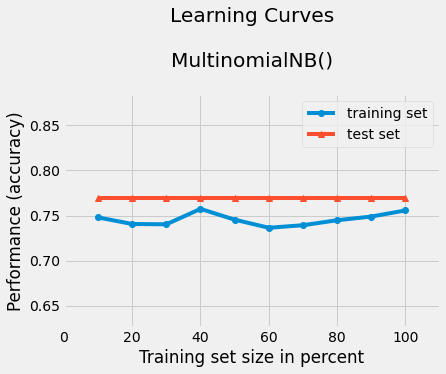

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plot_learning_curves(X_train, y_train, X_test, y_test, modelM,scoring='accuracy')
plt.show()

In [ ]:
modelB =BernoulliNB()
modelB.fit(X_train,y_train)
y_pred = modelB.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=modelB.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 0.8334728033472804
Test data accuracy: 0.8345864661654135


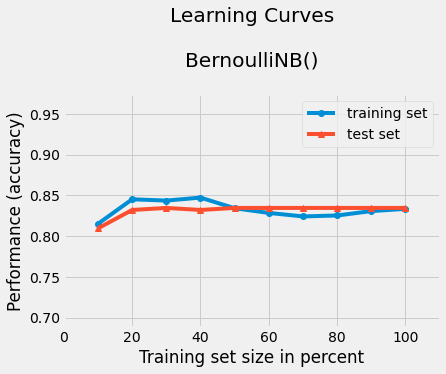

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plot_learning_curves(X_train, y_train, X_test, y_test, modelB,scoring='accuracy')
plt.show()

# Most Accuracy is Decision Tree at 92.48%


In [ ]:

unseen = [['vhigh','med'    ,'2',    '4',    'small'    , 'high'],
          ['vhigh',    'low',    '1',    '1',    'small',    'low']]
unseen_df = pd.DataFrame(unseen)
col_names = ['buying',    'maint',    'doors',    'persons',    'lug_boot',    'safety']
unseen_df.columns=col_names
unseen_df = unseen_df.apply(LabelEncoder().fit_transform)
XU = sc.fit_transform(unseen_df)
Treepred = modelT.predict(XU)
print(Treepred)


[1 0]
